In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
from sklearn.neighbors import NearestNeighbors

#첨부
# 사용자 데이터 정의
users = [
    {"mbti": "ENTP", "preferred_destinations": ["Paris, France", "Vienna, Austria"]},
    {"mbti": "ESFJ", "preferred_destinations": ["Rome, Italy", "New York, USA"]},
    {"mbti": "ISFJ", "preferred_destinations": ["Barcelona, Spain", "Grindelwald, Switzerland"]},
    {"mbti": "ENFJ", "preferred_destinations": ["Grindelwald, Switzerland", "Hawaii, USA"]},
    {"mbti": "ENTJ", "preferred_destinations": ["New York, USA", "Tokyo, Japan"]},
    {"mbti": "ESFP", "preferred_destinations": ["Las Vegas, USA", "Hong Kong"]},
    {"mbti": "ISFP", "preferred_destinations": ["Bali, Indonesia", "Quebec City, Canada"]},
    {"mbti": "INTP", "preferred_destinations": ["Florence, Italy", "Kyoto, Japan"]},
    {"mbti": "INTJ", "preferred_destinations": ["Madrid, Spain", "Paris, France"]},
    {"mbti": "ESTJ", "preferred_destinations": ["Vatican City","Busan, Korea"]},
    {"mbti": "INFP", "preferred_destinations": ["Prague, Czech Republic", "Istanbul, Turkey"]},
    {"mbti": "ENFP", "preferred_destinations": ["Amsterdam, Netherlands", "Cape Town, South Africa"]},
    {"mbti": "ESFJ", "preferred_destinations": ["Rome, Italy", "New York, USA"]},
    {"mbti": "ISTP", "preferred_destinations": ["Munich, Germany", "Seoul, South Korea"]},
    {"mbti": "ISTJ", "preferred_destinations": ["London, UK", "Sydney, Australia"]},
    {"mbti": "ESTP", "preferred_destinations": ["Bangkok, Thailand", "Miami, USA"]},
]

# 사용자 MBTI를 벡터화하는 함수 정의
def mbti_to_vector(mbti):
    mbti_dict = {'I': 0, 'E': 1, 'N': 1, 'S': 0, 'T': 1, 'F': 0, 'J': 0, 'P': 1}
    return np.array([mbti_dict[char] for char in mbti])

# 사용자 데이터를 벡터화
X = np.array([mbti_to_vector(user['mbti']) for user in users])

# KNN 모델 생성 및 학습
knn = NearestNeighbors(n_neighbors=1, algorithm='auto')
knn.fit(X)

# 추천을 생성하는 함수 정의
def generate_recommendations(mbti):
    mbti_vector = mbti_to_vector(mbti).reshape(1, -1)
    distances, indices = knn.kneighbors(mbti_vector)
    recommendations = set()  # 중복을 제거하기 위해 set 사용
    for idx in indices.flatten():
        recommendations.update(users[idx]['preferred_destinations'])
    return list(recommendations)[:2]  # 상위 2개의 여행지 반환

# 임의로 MBTI 정보를 받아 추천 여행지를 출력
input_mbti = "ISTP"  # 여기에 실제 입력을 받을 수 있음
recommendations = generate_recommendations(input_mbti)
print("추천 여행지:", recommendations)

추천 여행지: ['Seoul, South Korea', 'Munich, Germany']


In [ ]:
# 사용자 데이터 정의
users = [
    {"mbti": "ENTP", "preferred_destinations": ["Paris, France", "Vienna, Austria"]},
    {"mbti": "ESFJ", "preferred_destinations": ["Rome, Italy", "New York, USA"]},
    {"mbti": "ISFJ", "preferred_destinations": ["Barcelona, Spain", "Grindelwald, Switzerland"]},
    {"mbti": "ENFJ", "preferred_destinations": ["Grindelwald, Switzerland", "Hawaii, USA"]},
    {"mbti": "ENTJ", "preferred_destinations": ["New York, USA", "Tokyo, Japan"]},
    {"mbti": "ESFP", "preferred_destinations": ["Las Vegas, USA", "Hong Kong"]},
    {"mbti": "ISFP", "preferred_destinations": ["Bali, Indonesia", "Quebec City, Canada"]},
    {"mbti": "INTP", "preferred_destinations": ["Florence, Italy", "Kyoto, Japan"]},
    {"mbti": "INTJ", "preferred_destinations": ["Madrid, Spain", "Paris, France"]},
    {"mbti": "ESTJ", "preferred_destinations": ["Vatican City"]},
    {"mbti": "INFP", "preferred_destinations": ["Prague, Czech Republic", "Istanbul, Turkey"]},
    {"mbti": "ENFP", "preferred_destinations": ["Amsterdam, Netherlands", "Cape Town, South Africa"]},
    {"mbti": "ISTP", "preferred_destinations": ["Munich, Germany", "Seoul, South Korea"]},
    {"mbti": "ISTJ", "preferred_destinations": ["London, UK", "Sydney, Australia"]},
    {"mbti": "ESTP", "preferred_destinations": ["Bangkok, Thailand", "Miami, USA"]},
]

# 사용자 MBTI를 벡터화하는 함수 정의
def mbti_to_vector(mbti):
    mbti_dict = {'I': 0, 'E': 1, 'N': 1, 'S': 0, 'T': 1, 'F': 0, 'J': 0, 'P': 1}
    return np.array([mbti_dict[char] for char in mbti])

# 사용자 데이터를 벡터화
X = np.array([mbti_to_vector(user['mbti']) for user in users])
y = [user['preferred_destinations'] for user in users]

# 데이터 확인
print("벡터화된 사용자 데이터:", X)
print("사용자 선호 여행지 데이터:", y)

벡터화된 사용자 데이터: [[1 1 1 1]
 [1 0 0 0]
 [0 0 0 0]
 [1 1 0 0]
 [1 1 1 0]
 [1 0 0 1]
 [0 0 0 1]
 [0 1 1 1]
 [0 1 1 0]
 [1 0 1 0]
 [0 1 0 1]
 [1 1 0 1]
 [0 0 1 1]
 [0 0 1 0]
 [1 0 1 1]]
사용자 선호 여행지 데이터: [['Paris, France', 'Vienna, Austria'], ['Rome, Italy', 'New York, USA'], ['Barcelona, Spain', 'Grindelwald, Switzerland'], ['Grindelwald, Switzerland', 'Hawaii, USA'], ['New York, USA', 'Tokyo, Japan'], ['Las Vegas, USA', 'Hong Kong'], ['Bali, Indonesia', 'Quebec City, Canada'], ['Florence, Italy', 'Kyoto, Japan'], ['Madrid, Spain', 'Paris, France'], ['Vatican City'], ['Prague, Czech Republic', 'Istanbul, Turkey'], ['Amsterdam, Netherlands', 'Cape Town, South Africa'], ['Munich, Germany', 'Seoul, South Korea'], ['London, UK', 'Sydney, Australia'], ['Bangkok, Thailand', 'Miami, USA']]


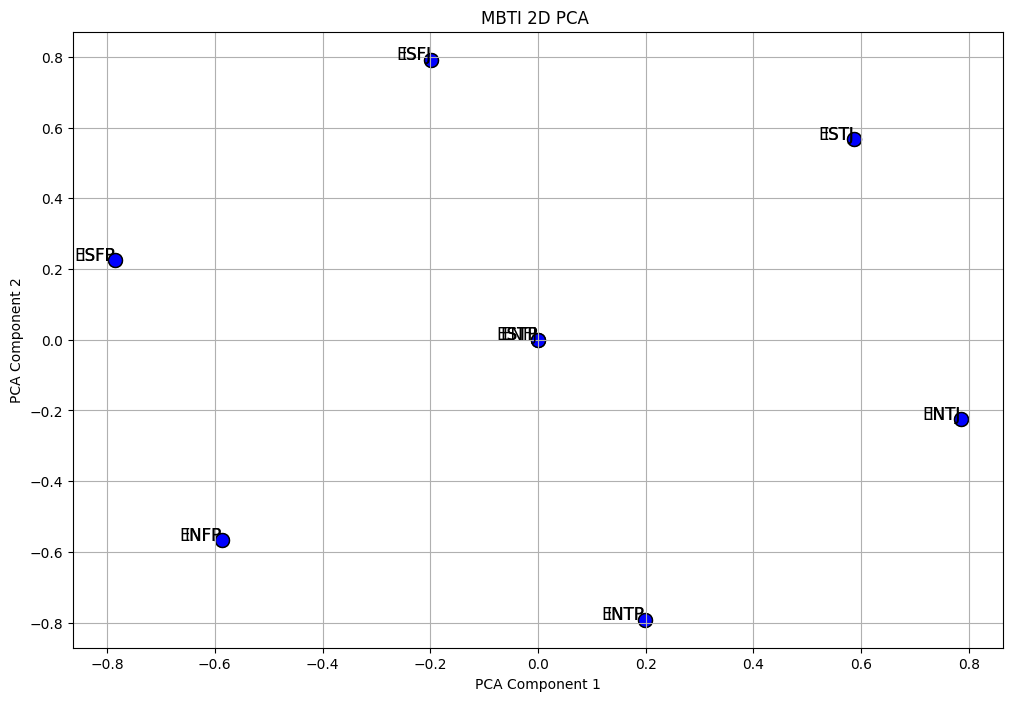

In [ ]:
# 필요한 라이브러리 설치
#!pip install numpy scikit-learn matplotlib

# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 사용자 데이터 정의
users = [
    {"mbti": "ENTP", "preferred_destinations": ["Paris, France", "Vienna, Austria"]},
    {"mbti": "ESFJ", "preferred_destinations": ["Rome, Italy", "New York, USA"]},
    {"mbti": "ISFJ", "preferred_destinations": ["Barcelona, Spain", "Grindelwald, Switzerland"]},
    {"mbti": "ENFJ", "preferred_destinations": ["Grindelwald, Switzerland", "Hawaii, USA"]},
    {"mbti": "ENTJ", "preferred_destinations": ["New York, USA", "Tokyo, Japan"]},
    {"mbti": "ESFP", "preferred_destinations": ["Las Vegas, USA", "Hong Kong"]},
    {"mbti": "ISFP", "preferred_destinations": ["Bali, Indonesia", "Quebec City, Canada"]},
    {"mbti": "INTP", "preferred_destinations": ["Florence, Italy", "Kyoto, Japan"]},
    {"mbti": "INTJ", "preferred_destinations": ["Madrid, Spain", "Paris, France"]},
    {"mbti": "ESTJ", "preferred_destinations": ["Vatican City"]},
    {"mbti": "INFP", "preferred_destinations": ["Prague, Czech Republic", "Istanbul, Turkey"]},
    {"mbti": "ENFP", "preferred_destinations": ["Amsterdam, Netherlands", "Cape Town, South Africa"]},
    {"mbti": "ISTP", "preferred_destinations": ["Munich, Germany", "Seoul, South Korea"]},
    {"mbti": "ISTJ", "preferred_destinations": ["London, UK", "Sydney, Australia"]},
    {"mbti": "ESTP", "preferred_destinations": ["Bangkok, Thailand", "Miami, USA"]},
]

# 사용자 MBTI를 벡터화하는 함수 정의
def mbti_to_vector(mbti):
    mbti_dict = {'I': 0, 'E': 1, 'N': 1, 'S': 0, 'T': 1, 'F': 0, 'J': 0, 'P': 1}
    return np.array([mbti_dict[char] for char in mbti])

# 사용자 데이터를 벡터화
X = np.array([mbti_to_vector(user['mbti']) for user in users])
mbti_labels = [user['mbti'] for user in users]

# PCA를 사용하여 데이터 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE를 사용하여 데이터 차원 축소 (선택 사항)
# tsne = TSNE(n_components=2)
# X_tsne = tsne.fit_transform(X)

# 시각화
plt.figure(figsize=(12, 8))

# PCA 결과 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', s=100)
for i, mbti in enumerate(mbti_labels):
    plt.text(X_pca[i, 0], X_pca[i, 1], mbti, fontsize=12, ha='right')

plt.title("MBTI 2D PCA ")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

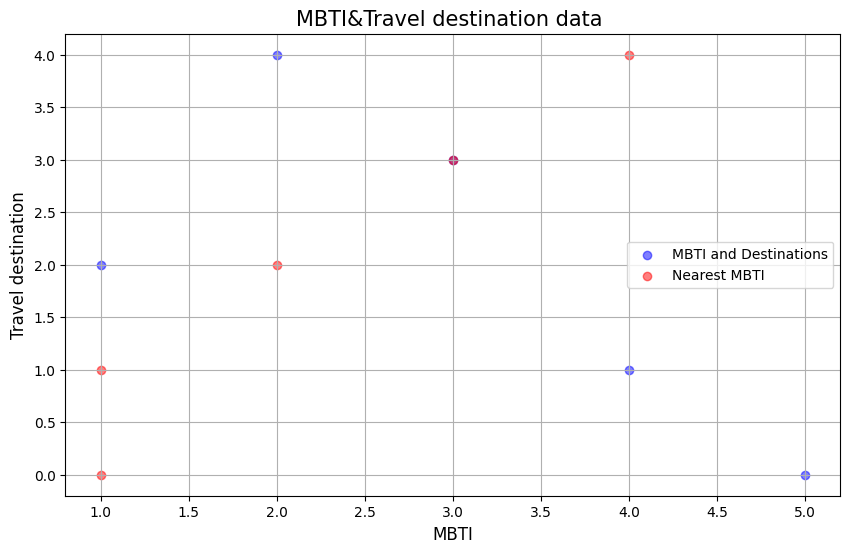

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder

# 가상의 MBTI와 여행지 데이터 생성
mbti_data = np.array(['INTJ', 'ENTP', 'ESFJ', 'ISTP', 'INFP'])
destination_data = np.array([
    ['Paris, France'],
    ['Vienna, Austria'],
    ['Rome, Italy'],
    ['New York, USA'],
    ['Kyoto, Japan']
])

# MBTI를 숫자로 매핑하는 딕셔너리 생성
mbti_mapping = {
    'INTJ': 1, 'ENTP': 2, 'ESFJ': 3, 'ISTP': 4, 'INFP': 5
}

# mbti_data를 숫자로 변환하여 학습
mbti_data_numeric = np.array([mbti_mapping[mbti] for mbti in mbti_data])

# LabelEncoder를 사용하여 문자열 데이터를 숫자로 변환
label_encoder = LabelEncoder()
destination_data_numeric = label_encoder.fit_transform(destination_data.ravel())

# KNN 모델 생성 및 학습
knn = NearestNeighbors(n_neighbors=1, algorithm='auto')
knn.fit(mbti_data_numeric.reshape(-1, 1))

# 모든 여행지 데이터의 가장 가까운 MBTI 찾기
distances, indices = knn.kneighbors(destination_data_numeric.reshape(-1, 1))

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(mbti_data_numeric, destination_data_numeric, color='blue', label='MBTI and Destinations', alpha=0.5)
plt.scatter(mbti_data_numeric[indices], destination_data_numeric, color='red', label='Nearest MBTI', alpha=0.5)
plt.title("MBTI&Travel destination data ", fontsize=15)
plt.xlabel("MBTI", fontsize=12)
plt.ylabel("Travel destination", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

추천 여행지 for ENTJ: ['Hong Kong' 'Istanbul, Turkey' 'Bali, Indonesia']


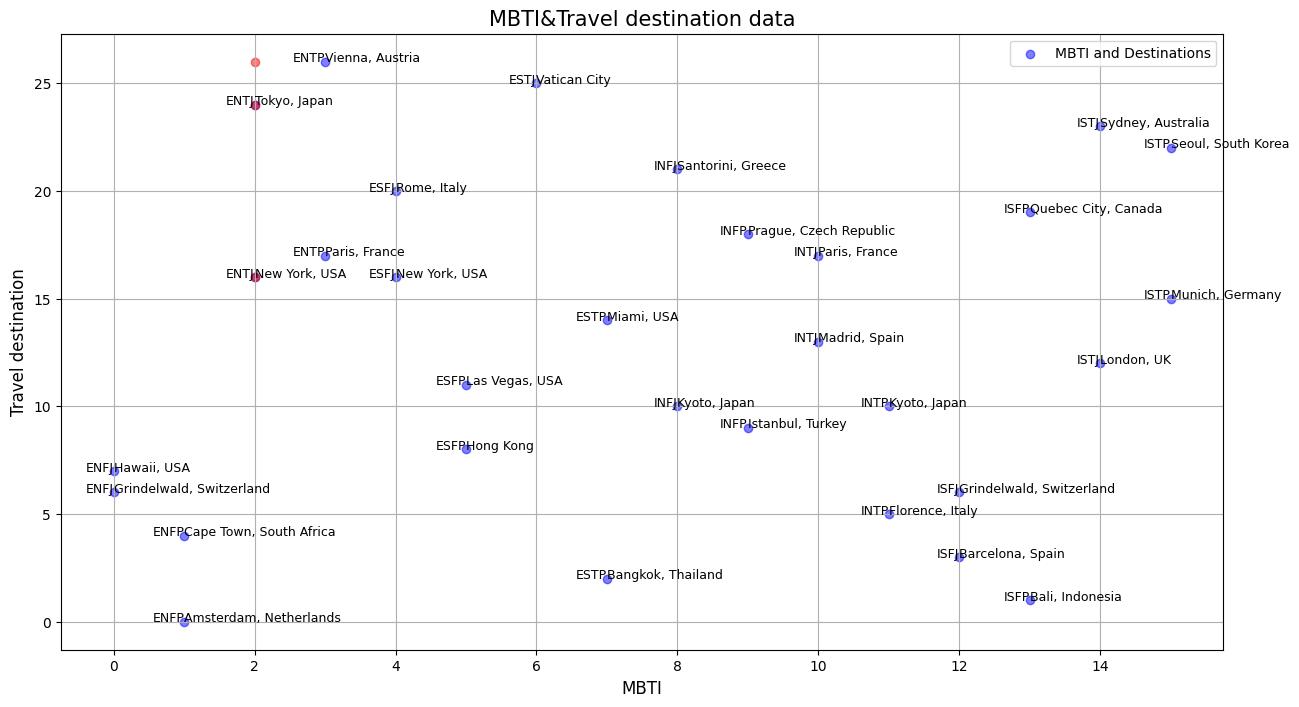

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder

#첨부
# 주어진 데이터 (INFJ와 여행지 추가)
data = [
    {"mbti": "ENTP", "preferred_destinations": ["Paris, France", "Vienna, Austria"]},
    {"mbti": "ESFJ", "preferred_destinations": ["Rome, Italy", "New York, USA"]},
    {"mbti": "ISFJ", "preferred_destinations": ["Barcelona, Spain", "Grindelwald, Switzerland"]},
    {"mbti": "ENFJ", "preferred_destinations": ["Grindelwald, Switzerland", "Hawaii, USA"]},
    {"mbti": "ENTJ", "preferred_destinations": ["New York, USA", "Tokyo, Japan"]},
    {"mbti": "ESFP", "preferred_destinations": ["Las Vegas, USA", "Hong Kong"]},
    {"mbti": "ISFP", "preferred_destinations": ["Bali, Indonesia", "Quebec City, Canada"]},
    {"mbti": "INTP", "preferred_destinations": ["Florence, Italy", "Kyoto, Japan"]},
    {"mbti": "INTJ", "preferred_destinations": ["Madrid, Spain", "Paris, France"]},
    {"mbti": "ESTJ", "preferred_destinations": ["Vatican City"]},
    {"mbti": "INFP", "preferred_destinations": ["Prague, Czech Republic", "Istanbul, Turkey"]},
    {"mbti": "ENFP", "preferred_destinations": ["Amsterdam, Netherlands", "Cape Town, South Africa"]},
    {"mbti": "ISTP", "preferred_destinations": ["Munich, Germany", "Seoul, South Korea"]},
    {"mbti": "ISTJ", "preferred_destinations": ["London, UK", "Sydney, Australia"]},
    {"mbti": "ESTP", "preferred_destinations": ["Bangkok, Thailand", "Miami, USA"]},
    {"mbti": "INFJ", "preferred_destinations": ["Kyoto, Japan", "Santorini, Greece"]}  # 추가된 INFJ 데이터
]

# 데이터를 MBTI와 여행지로 분리
mbti_list = []
destination_list = []
for item in data:
    mbti_list.extend([item["mbti"]] * len(item["preferred_destinations"]))
    destination_list.extend(item["preferred_destinations"])

# LabelEncoder를 사용하여 문자열 데이터를 숫자로 변환
label_encoder_mbti = LabelEncoder()
mbti_numeric = label_encoder_mbti.fit_transform(mbti_list)

label_encoder_destination = LabelEncoder()
destination_numeric = label_encoder_destination.fit_transform(destination_list)

# MBTI 데이터와 여행지 데이터 결합 (KNN 학습용)
X = np.array(mbti_numeric).reshape(-1, 1)
y = np.array(destination_numeric)

# KNN 모델 생성 및 학습
knn = NearestNeighbors(n_neighbors=3, algorithm='auto')
knn.fit(X)

# 테스트용 사용자 MBTI 데이터 (여기서는 "INTJ"를 예시로 사용)
user_mbti = "ENTJ"
user_mbti_numeric = label_encoder_mbti.transform([user_mbti]).reshape(-1, 1)

# 추천 여행지 찾기
distances, indices = knn.kneighbors(user_mbti_numeric)
recommended_destinations = label_encoder_destination.inverse_transform(indices.flatten())

print(f"추천 여행지 for {user_mbti}: {recommended_destinations}")

# 결과 시각화
plt.figure(figsize=(15, 8))

# 모든 MBTI와 여행지 데이터 시각화
plt.scatter(mbti_numeric, y, color='blue', label='MBTI and Destinations', alpha=0.5)

# 사용자의 MBTI와 추천 여행지 시각화
for i in range(len(user_mbti_numeric)):
    for j in range(len(indices[i])):
        nearest_dest_index = indices[i][j]
        plt.scatter(user_mbti_numeric[i], y[nearest_dest_index], color='red', alpha=0.5)

# MBTI와 여행지 레이블 표시
for i, txt in enumerate(mbti_list):
    plt.annotate(txt, (mbti_numeric[i], y[i]), fontsize=9, ha='right')

for i, txt in enumerate(destination_list):
    plt.annotate(txt, (mbti_numeric[i], y[i]), fontsize=9, ha='left')

plt.title("MBTI&Travel destination data", fontsize=15)
plt.xlabel("MBTI", fontsize=12)
plt.ylabel("Travel destination", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()